# Questions
- What chemical characteristics are most important in predicting hte quality of wine?
- Is a certain type of wine (red or white) associated with higher quality?
- Do wines with higgher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?
- What level of acidity is associated with the highest quality?

# Wrangle
## Import dataset

In [112]:
import numpy as np
import pandas as pd

red_df = pd.read_csv('wineQuality-red.csv', sep=';')
white_df = pd.read_csv('wineQuality-white.csv', sep=';')

In [113]:
print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
print(white_df.shape)
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [115]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [116]:
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [117]:
print('There are {} duplicate rows in the white wine dataset'.\
      format(white_df.duplicated().sum()))

print('There are {} duplicate rows in the red wine dataset'.\
      format(red_df.duplicated().sum()))

There are 937 duplicate rows in the white wine dataset
There are 240 duplicate rows in the red wine dataset


In [118]:
print('There are {} unique values of quality in the white wine dataset'.\
      format(white_df.quality.nunique()))

print('There are {} unique values of quality in the red wine dataset'.\
      format(red_df.quality.nunique()))

There are 7 unique values of quality in the white wine dataset
There are 6 unique values of quality in the red wine dataset


## Create Color Columns

In [119]:
# Add the color column
color_red = np.repeat('red', red_df.shape[0])
red_df['color'] = color_red

# or 

white_df['color'] = 'white'

In [120]:
# Combine the data frame

wine_df = red_df.append(white_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Explore

In [121]:
wine_df.groupby(['quality','color'],as_index= False).mean()

,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [122]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [123]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [124]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] 

In [125]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [126]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [127]:
# Find the mean quality of each acidity level 
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

#  Draw Conclusion

### Do wines with higher alcoholic content receive better ratings?

In [128]:
# get the median amount of alcohol content
wine_df.alcohol.median()

10.3

In [129]:
# select samples with alcohol content less than the median
low_alcohol = wine_df[wine_df.alcohol < 10.3]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df.alcohol >= 10.3]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [130]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

### Do sweeter wines receive better ratings?

In [131]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

3.0

In [132]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [133]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

#  Communicate

In [134]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Create arrays for red bar heights white bar heights
Each bar's height is based on the proportion of samples of that color with that quality rating.

In [136]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
# get proportions 
red_proportions = color_counts['red'] / color_totals['red']
white_proportions = color_counts['white'] / color_totals['white']

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

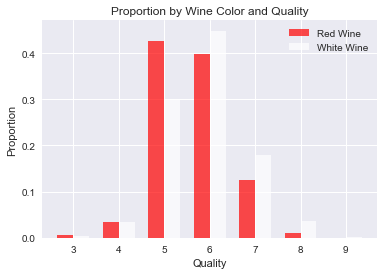

In [137]:
red_proportions['9'] = 0 # We're missing a red wine value for a the 9 rating
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()